In [1]:
import csv
import sys
import os
import pickle
import random
import numpy as np
import time
import operator
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

from math import sqrt
import statsmodels.stats.api as sms

import scipy.stats

In [2]:
save_fig=True

In [3]:
np.set_printoptions(precision=2)

In [4]:
sys.path.append('../python')
from permutation import permutation, compute_alignment_strength
from utils.utils_funcs import get_variance, get_distinctness, get_distinctness_from_nearest_5, aggregate_embeddings_visual_and_language
from utils.utils_funcs import load_data_to_dict

In [5]:
def get_alignment_strength(struct,concepts,relative):
    visual_embeddings_list=list()
    langauge_embeddings_list=list()
    for concept in concepts:
        embeddings=struct["embeds"][concept]
        visual_embeddings_list.append(embeddings["visual"])
        langauge_embeddings_list.append(embeddings["language"])
    z_0=np.array(visual_embeddings_list)
    z_1=np.array(langauge_embeddings_list)
    if relative:
        return permutation(z_0,z_1,n_sim=100)[0]
    else:
        return compute_alignment_strength(z_0,z_1)

----

In [6]:
vg_noun_data=pickle.load(open("../data/dumped_embeddings/vg_noun_least20_ll_swav_bert_20.pkl","rb"))
vg_verb_data=pickle.load(open("../data/dumped_embeddings/vg_verb_least20_ll_swav_bert_20.pkl","rb"))

aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,20,20)
aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,20,20)

In [7]:
noun_visual_variance,noun_language_variance=get_variance(vg_noun_data)
verb_visual_variance,verb_language_variance=get_variance(vg_verb_data)

In [8]:
noun_visual_distinctness,noun_language_distinctness=get_distinctness(vg_noun_data)
verb_visual_distinctness,verb_language_distinctness=get_distinctness(vg_verb_data)

----

In [9]:
def print_statistics(value_dict,name):
    print("mean "+name+":",np.mean(list(value_dict.values())),"95% confidence:",sms.DescrStatsW(list(value_dict.values())).tconfint_mean())

In [10]:
print("vg noun visual:")
print_statistics(noun_visual_variance,"variance")

print("vg verb visual:")
print_statistics(verb_visual_variance,"variance")

print("vg noun language:")
print_statistics(noun_language_variance,"variance")

print("vg verb language:")
print_statistics(verb_language_variance,"variance")

vg noun visual:
mean variance: 0.74624723 95% confidence: (0.7315858518875439, 0.7609086846939498)
vg verb visual:
mean variance: 0.85693115 95% confidence: (0.845432021881649, 0.8684302246771308)
vg noun language:
mean variance: 9.230545 95% confidence: (9.075986224720697, 9.385104399044067)
vg verb language:
mean variance: 9.099842 95% confidence: (8.937698007086327, 9.26198719410444)


In [11]:
print("vg noun visual:")
print_statistics(noun_visual_distinctness,"distinctness")

print("vg verb visual:")
print_statistics(verb_visual_distinctness,"distinctness")

print("vg noun language:")
print_statistics(noun_language_distinctness,"distinctness")

print("vg verb language:")
print_statistics(verb_language_distinctness,"distinctness")

vg noun visual:
mean distinctness: 1.0762373666914682 95% confidence: (1.0690750794474924, 1.083399653935444)
vg verb visual:
mean distinctness: 1.0365499585902072 95% confidence: (1.0330640314538138, 1.0400358857266006)
vg noun language:
mean distinctness: 14.069331854095804 95% confidence: (13.967759012842953, 14.170904695348659)
vg verb language:
mean distinctness: 13.483786927791948 95% confidence: (13.371705713065829, 13.595868142518068)


In [12]:
def t_test(variance1,variance2):
    print(scipy.stats.ttest_ind(list(variance1.values()),list(variance2.values())))

In [13]:
t_test(noun_visual_variance,verb_visual_variance)

Ttest_indResult(statistic=-11.710444212308941, pvalue=1.3747878412361417e-27)


In [14]:
t_test(noun_language_variance,verb_language_variance)

Ttest_indResult(statistic=1.1502521341131275, pvalue=0.25069766619830725)


In [15]:
t_test(noun_visual_distinctness,verb_visual_distinctness)

Ttest_indResult(statistic=9.822159721119402, pvalue=1.2616452320935945e-20)


In [16]:
t_test(noun_language_distinctness,verb_language_distinctness)

Ttest_indResult(statistic=7.631495376974633, pvalue=1.5869189289369576e-13)


---

In [17]:
temp1=list(noun_visual_variance.values())+list(noun_visual_distinctness.values())+ \
    list(noun_language_variance.values())+list(noun_language_distinctness.values())
temp2=["visual_var"]*len(noun_visual_variance)+["visual_dis"]*len(noun_visual_distinctness)+ \
    ["lang_var"]*len(noun_language_variance)+["lang_dis"]*len(noun_language_distinctness)

df1=pd.DataFrame(dict(
    value=temp1,
    measure=temp2
))
df1["type"]="VG Nouns"

In [18]:
temp1=list(verb_visual_variance.values())+list(verb_visual_distinctness.values())+ \
    list(verb_language_variance.values())+list(verb_language_distinctness.values())
temp2=["visual_var"]*len(verb_visual_variance)+["visual_dis"]*len(verb_visual_distinctness)+ \
    ["lang_var"]*len(verb_language_variance)+["lang_dis"]*len(verb_language_distinctness)
df2=pd.DataFrame(dict(
    value=temp1,
    measure=temp2
))
df2["type"]="VG Verbs"

In [19]:
df=pd.concat([df1,df2])

In [20]:
# df

In [21]:
# sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)  # fontsize of the axes title
plt.rc('axes', labelsize=18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)  # fontsize of the tick labels
plt.rc('legend', fontsize=18)  # legend fontsize
plt.rc('font', size=18)  # controls default text sizes
# plt.figure(figsize=(10, 6), tight_layout=True)

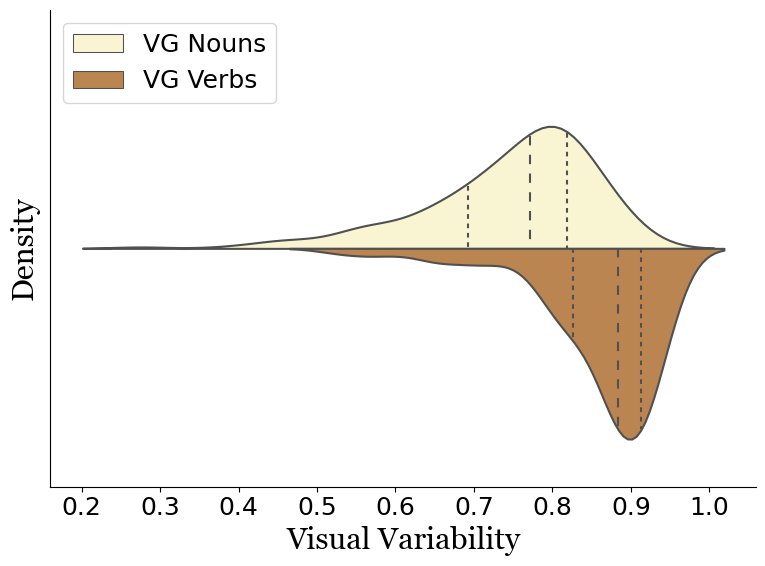

In [22]:
palette = ['lemonchiffon', 'peru']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="visual_var"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Visual Variability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/visual_var_vg.png",dpi=600)
plt.show()

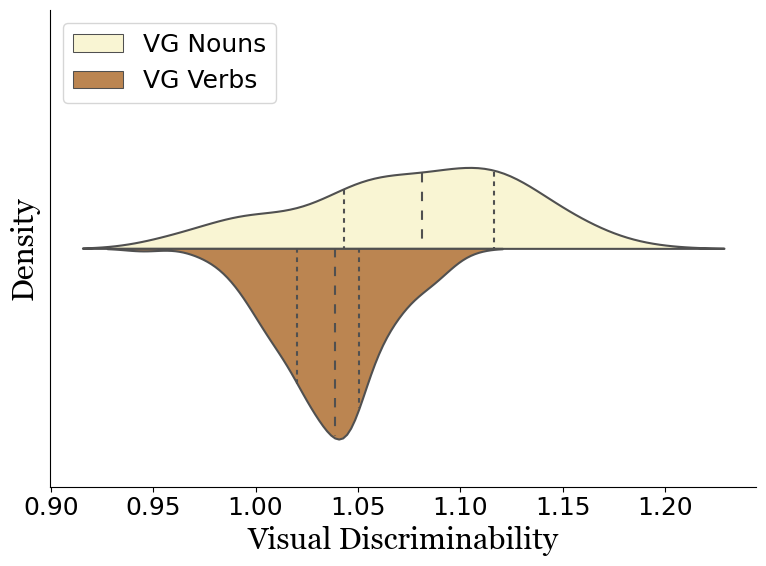

In [23]:
palette = ['lemonchiffon', 'peru']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="visual_dis"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Visual Discriminability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/visual_dis_vg.png",dpi=600)
plt.show()

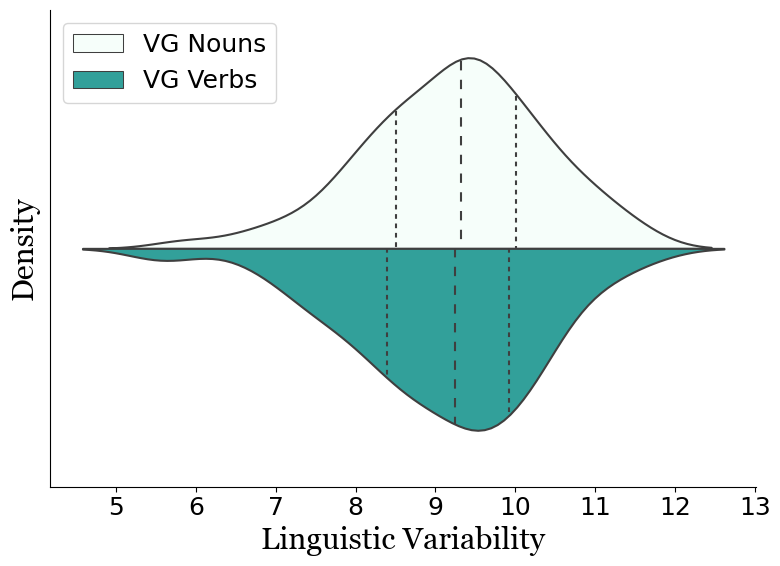

In [24]:
palette = ['mintcream', 'lightseagreen']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="lang_var"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Linguistic Variability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/lang_var_vg.png",dpi=600)
plt.show()

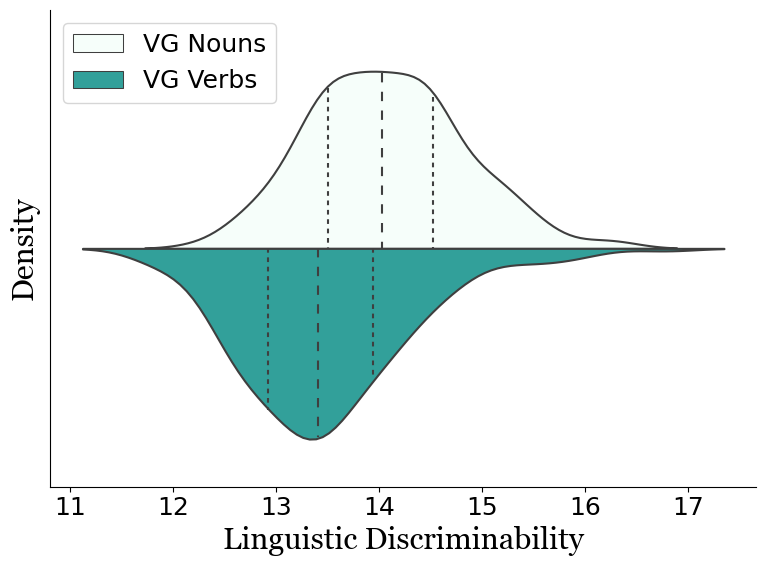

In [25]:
palette = ['mintcream', 'lightseagreen']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="lang_dis"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Linguistic Discriminability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/lang_dis_vg.png",dpi=600)
plt.show()